In [1]:
import numpy as np
import matplotlib.pyplot as plt
X_train = np.load("reshaped_14.npy")

In [ ]:
mean = 10
cov  = 10
samples = 60000
# input_size = 784
input_size = 196
# input_size = 100
Xf = X_train.reshape(samples,input_size)
Xf = Xf/255.0
# defining functions

np.random.seed(420)

def sigm(x):
    return 1/(1+np.exp(-x))

def diff_sigm(x):
    return (sigm(x)-(sigm(x)**2))

def relu(x):
    x[x<0]=0
    return x

def diff_relu(x):
    res = x
    return res * (res > 1)

def tanha(x):
    return (2*sigm(2*x) - 1)

def diff_tanh(x):
    return (1 - tanha(x)**2)

def diff_SSE(y,x):
    return (2*(y-x))

def layer(x,W,b):
    return np.matmul(x,W)+b

def backprop_layer_relu(prev_delta,out_prev,weights_prev):
    sn = (diff_relu(out_prev)*np.matmul(prev_delta,weights_prev.T))
    return sn

def backprop_layer_sigm(prev_delta,out_prev,weights_prev):
    sn = (diff_sigm(out_prev)*np.matmul(prev_delta,weights_prev.T))
    return sn

Wc = np.random.normal(0,1e-6,(input_size,mean))
Bc = np.random.normal(0,1e-6,(1,mean))

Wm = np.random.normal(0,1e-6,(input_size,mean))
Bm = np.random.normal(0,1e-6,(1,mean))

Wd = np.random.normal(0,1e-6,(mean,input_size))
Bd = np.random.normal(0,1e-6,(1,input_size))

2526879.8648727266 epoch =  0 batch = 99


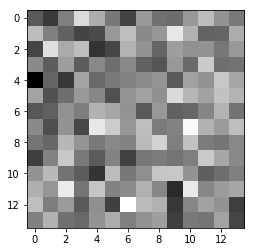

2296340.9115992906 epoch =  1 batch = 99
2794271.3336318596 epoch =  2 batch = 99
2335959.834556709 epoch =  3 batch = 99
1793857.974844461 epoch =  4 batch = 99
1736258.4432221488 epoch =  5 batch = 99
1593095.7970195133 epoch =  6 batch = 99
1668335.8062748786 epoch =  7 batch = 99
1565418.376597199 epoch =  8 batch = 99
1548171.8132247638 epoch =  9 batch = 99
1493666.569254497 epoch =  10 batch = 99
1599137.4053051893 epoch =  11 batch = 99
1530362.419764598 epoch =  12 batch = 99
1476965.1724956587 epoch =  13 batch = 99
1630753.8553172427 epoch =  14 batch = 99
1549165.848918897 epoch =  15 batch = 99
1543934.077390286 epoch =  16 batch = 99
1551454.972685127 epoch =  17 batch = 99
1477329.0740972538 epoch =  18 batch = 99
1551559.2919121282 epoch =  19 batch = 99
1532671.188119644 epoch =  20 batch = 99
1579223.4010967198 epoch =  21 batch = 99
1521096.3837255263 epoch =  22 batch = 99
1530500.6912582098 epoch =  23 batch = 99


In [ ]:
#Here the covariance is log coavriance but named as coavriance for peace of mind while coding
lr = 1e-5
epochs = 500
batch_size = 600
number_of_batches = samples//batch_size
X_t = Xf
# plt.imshow(X[1][10].reshape(14,14), cmap='gray')
for i in range(epochs):
    wm = np.zeros(Wm.shape)
    bm = np.zeros(Bm.shape)
    wc = np.zeros(Wc.shape)
    bc = np.zeros(Bc.shape)
    wd = np.zeros(Wd.shape)
    bd = np.zeros(Bd.shape)
    loss = 0
    for j in range(number_of_batches):
        X = (X_t[j*batch_size:(j+1)*batch_size])
        indices = np.arange(len(X)).astype(int)
        np.random.shuffle(indices)
        X = X[indices]
        #forward pass
        outm = layer(X,Wm,Bm)
        mean  = tanha(outm)
        outc = layer(X,Wc,Bc)
        cova  = tanha(outc)
        gaus = np.random.normal(0,1)
        Z    = mean + (np.exp(0.5*cova)*gaus)
        outy = layer(Z,Wd,Bd)
        y    = sigm(outy)
        # Backprop decoder part 
        temp = diff_SSE(y,X)*diff_sigm(outy)
#         temp = diff_CCE(X,y)*diff_sigm(outy)
        bd   += np.sum(temp,axis=0)
        wd   += np.matmul(Z.T,temp)
    
        ### Backprop Encoder part
        ## Tanh activation, so directly writing derivatives
        diffm = 1 - mean**2
        diffc = 1 - cova**2
        sct = 0.5*gaus*np.exp(0.5*cova)*np.matmul(temp,Wd.T)*diffc
        smt = np.matmul(temp,Wd.T)*diffm
        sm = smt + 2*(mean)*diffm
        sc = sct + 0.5*(np.exp(cova)-1)*diffc 
        ### 
    
        bm += np.sum(sm, axis=0).reshape(bm.shape)
        wm += np.matmul(X.T,sm)
    
        bc += np.sum(sc, axis=0).reshape(bc.shape)
        wc += np.matmul(X.T,sc)
    
        loss += np.sum(np.linalg.norm(X-y)**2) + np.sum(np.exp(cova)-1-cova + mean*mean)
        
    Wm -= lr*wm
    Bm -= lr*bm
    Wc -= lr*wc
    Bc -= lr*bc
    Bd -= lr*bd
    Wd -= lr*wd

    print(loss, "epoch = ", i, "batch =", j)
    if(i%50 == 0):
        img = y[1].reshape(14,14)*255.0
        plt.imshow(img, cmap='gray')
        plt.show()

In [ ]:
w=14
h=14
fig=plt.figure(figsize=(w/2,h/2))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    Z = np.random.normal(0,1,(Bc.shape))
    Z    = mean + np.multiply((np.exp(0.5*cova)),gaus)
    outy = layer(Z,Wd,Bd)
    y    = sigm(outy)
    img = y[i].reshape(w,h)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
print(np.sum(np.exp(cova)-1-cova + mean*mean))